
# Fetching Forex Rates

Fetching historical daily rates for **AUDUSD** (Austarlian Dollar / US Dollar).

Using [AlphaVantage Service](https://alphavantage.co) and [alpha_vantage package](https://github.com/RomelTorres/alpha_vantage/).

## Prepare API Keys

Firstly, [get an API Key from AlphaVantage](https://www.alphavantage.co/support/#api-key). 
Secondly, [Set & Get API Keys from environment variable](https://stackoverflow.com/a/5971326/3381997). 


In [6]:
import os, sys

api_key = "6Z16V2GZLU7N0RKG"
try:  
   api_key = os.environ["ALPHAVANTAGE_API_KEY"]
   print("Found AlphaVantage API Key")
except KeyError: 
   print("Please set the environment variable ALPHAVANTAGE_API_KEY")
   sys.exit(1)

Please set the environment variable ALPHAVANTAGE_API_KEY


SystemExit: 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)



## Getting Data via REST API

For more info, please visit [AlphaVantage Docs](https://www.alphavantage.co/documentation/).

### Getting Data


In [13]:

import pandas as pd
import requests, io

base_url = 'https://www.alphavantage.co'
api_function = 'FX_DAILY'
from_symbol = 'USD' # Base
to_symbol = 'CAD' # Pricing
data_type = 'csv'
output_size = 'full'

# Building api_url
api_url = '{}/query?function={}&from_symbol={}&to_symbol={}&outputsize={}&apikey={}&datatype={}'.format(base_url,
                                                                                                        api_function,
                                                                                                        from_symbol,
                                                                                                        to_symbol,
                                                                                                        api_key,
                                                                                                        output_size,
                                                                                                        data_type)

# Getting Data
raw_data = requests.get(api_url)
forex_csv = raw_data.content
forex_df = pd.read_csv(io.StringIO(forex_csv.decode('utf-8')))


### Processing Data


In [14]:

forex_df['pre_close'] = forex_df.close.shift(-1)
forex_df['p_change'] = (forex_df.close / forex_df.pre_close - 1) # Raw percentage change
forex_df['pip_change'] = (forex_df.close / forex_df.pre_close - 1) * 10000 # Pip Change (Percentage of a Point)
forex_df.head()


### Sorting Data


In [15]:

# Sorting Data by dates
forex_df = forex_df.sort_values('timestamp', ascending=True) 
forex_df = forex_df.iloc[1:]

# Save & Print
forex_df.to_csv('../gen/{}{}_Daily_df.csv'.format(from_symbol, to_symbol))
forex_df.head()


timestamp    open    high     low   close  pre_close  p_change  \
4998  2001-08-03  1.5364  1.5371  1.5292  1.5292     1.5292  0.000000   
4997  2001-08-06  1.5298  1.5304  1.5251  1.5251     1.5292 -0.002681   
4996  2001-08-07  1.5252  1.5356  1.5230  1.5354     1.5251  0.006754   
4995  2001-08-08  1.5351  1.5358  1.5302  1.5343     1.5354 -0.000716   
4994  2001-08-09  1.5342  1.5406  1.5322  1.5395     1.5343  0.003389   

      pip_change  
4998    0.000000  
4997  -26.811405  
4996   67.536555  
4995   -7.164257  
4994   33.891677


## Getting Data via `alpha_vantage` package

Getting data via REST API can get messy sometime. Instead, We can use `alpha_vantage` package to get this done easily.

Visit [`alpha_vantage` Docs](https://github.com/RomelTorres/alpha_vantage/). 


In [16]:

from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib.pyplot as plt

fx = ForeignExchange(key=api_key, 
                     output_format='pandas',
                     indexing_type='date')
data_df, meta_data = fx.get_currency_exchange_daily(from_symbol=from_symbol,
                                                      to_symbol=to_symbol,
                                                      outputsize=output_size)
data_df = data_df.sort_values('date', ascending=True)

# Save & Print
print("meta_data: {}".format(meta_data))
data_df.head()


meta_data: {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'USD', '3. To Symbol': 'CAD', '4. Output Size': 'Full size', '5. Last Refreshed': '2019-06-19 11:05:00', '6. Time Zone': 'GMT+8'}


1. open  2. high  3. low  4. close
date                                          
2001-08-02   1.5364   1.5371  1.5292    1.5292
2001-08-03   1.5364   1.5371  1.5292    1.5292
2001-08-06   1.5298   1.5304  1.5251    1.5251
2001-08-07   1.5252   1.5356  1.5230    1.5354
2001-08-08   1.5351   1.5358  1.5302    1.5343


## Plotting Data

Plotting close data.


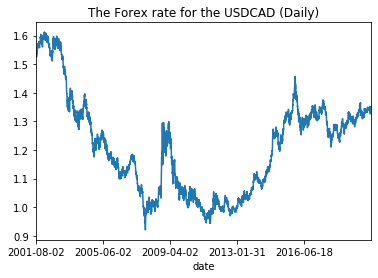

In [20]:

data_df['4. close'].plot()
plt.title('The Forex rate for the {}{} (Daily)'.format(from_symbol, to_symbol))
plt.show()


Daily pip Change for USDCAD since 2001-05-11


count    4999.000000
mean       -0.000012
std         0.005494
min        -0.039270
25%        -0.002892
50%         0.000000
75%         0.002780
max         0.034622
Name: p_change, dtype: float64

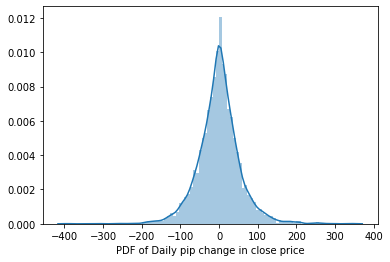

In [19]:
import seaborn as sns

sns.distplot(forex_df.pip_change,
             axlabel="PDF of Daily pip change in close price",
             bins=100)
print("Daily pip Change for {}{} since 2001-05-11".format(from_symbol, to_symbol))
forex_df.p_change.describe()